<a href="https://colab.research.google.com/github/james130625/notebook/blob/main/3_Alligator%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


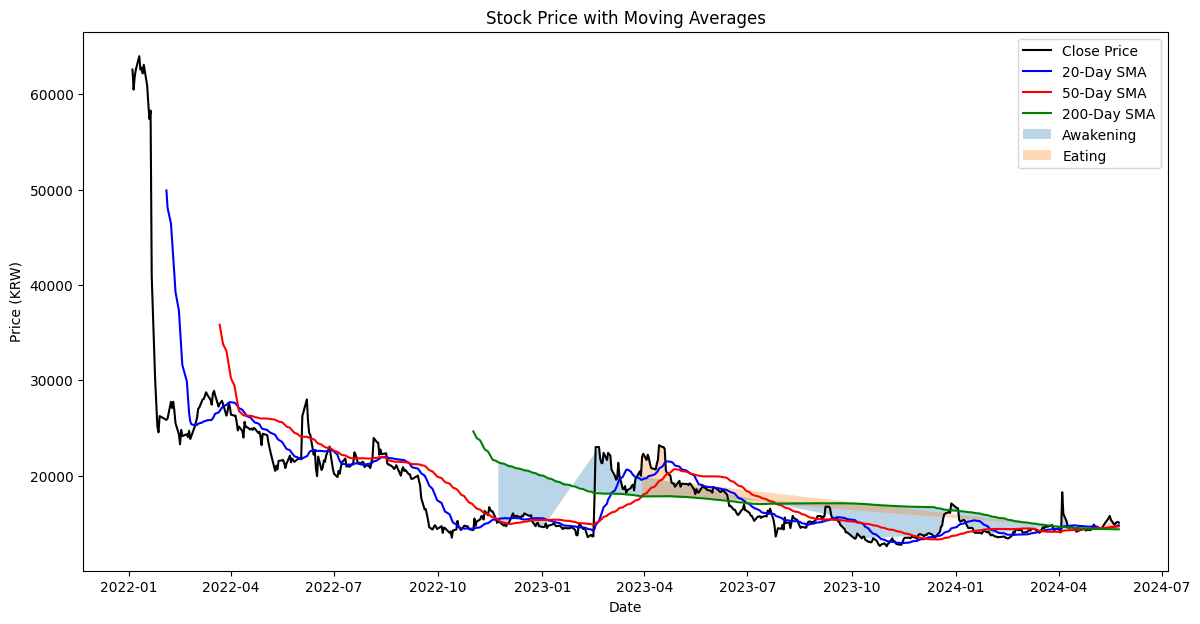

'Eating'

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Define the stock ticker and date range
ticker = "065660.KQ"
start_date = "2022-01-02"
end_date = datetime.today().strftime('%Y-%m-%d')

# Download stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate the moving averages
stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', color='black')
plt.plot(stock_data['SMA20'], label='20-Day SMA', color='blue')
plt.plot(stock_data['SMA50'], label='50-Day SMA', color='red')
plt.plot(stock_data['SMA200'], label='200-Day SMA', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()

# Identify the phases: Sleeping, Awakening, Eating
stock_data['Phase'] = 'Sleeping'

# Set conditions for different phases
conditions = [
    (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] > stock_data['SMA200']),
    (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] < stock_data['SMA200']),
]

choices = ['Eating', 'Awakening']

stock_data['Phase'] = np.select(conditions, choices, default='Sleeping')

# Plot the phases
phases = stock_data[stock_data['Phase'] != 'Sleeping']
for phase in ['Awakening', 'Eating']:
    phase_data = phases[phases['Phase'] == phase]
    plt.fill_between(phase_data.index, phase_data['SMA200'], phase_data['Close'], label=phase, alpha=0.3)

plt.legend()
plt.show()

# Display the phase of the most recent data point
current_phase = stock_data['Phase'].iloc[-1]

# Save the dataframe with phases for review
stock_data.to_csv("Stock_Phases.csv")

current_phase


[*********************100%%**********************]  1 of 1 completed


실시간 현재가: 15080.0
52주 최고가: 19820.0
52주 최저가: 12300.0
EMA(9): 15064.92709942545
EMA(12): 15018.073816311864
EMA(26): 14850.835258144654
EMA(50): 14693.956853926216
EMA(100): 14582.92842195504
EMA(200): 15055.853334130106
MACD: 167.2385581672097
MACD Signal Line: 143.04557164352428
RSI: 53.33333333333333
볼린저밴드 상한선: 15683.759007534354
볼린저밴드 하한선: 13920.240992465646
주간 변동성: 0.054997078517852745
주간 가격 변동: -0.018867924528301883
월간 가격 변동: 0.04794996525364836
최종분석 결과: Bearish


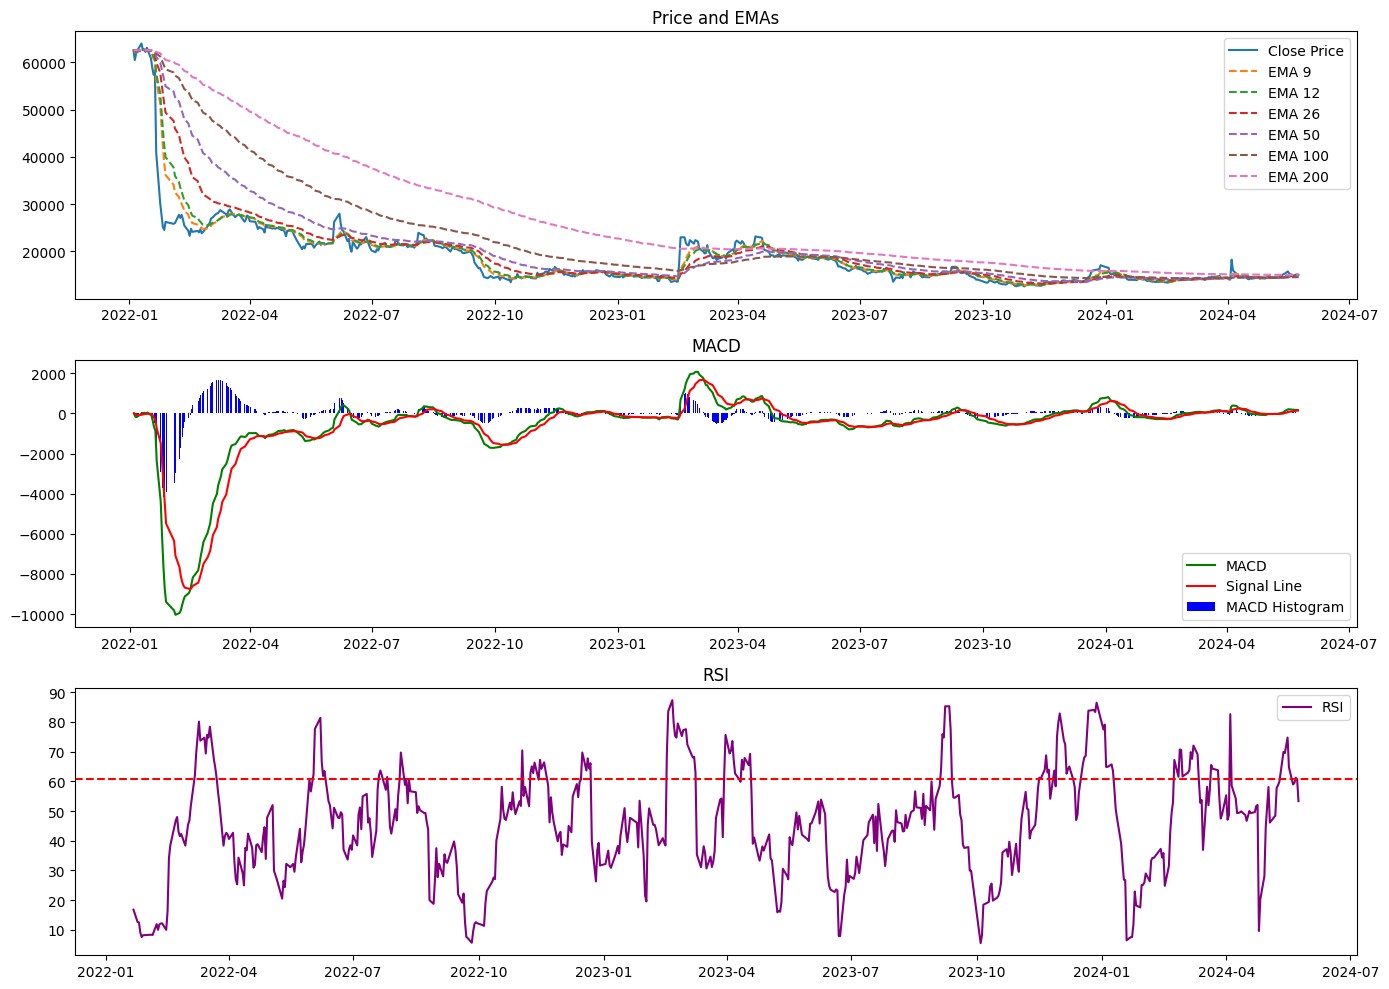

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 주식 데이터 수집
ticker = '065660.KQ'  # 안트로젠 (KOSDAQ)
data = yf.download(ticker, start='2022-01-02', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 실시간 현재가
real_time_price = data['Close'][-1]

# 52주 최고가와 최저가
high_52week = data['High'][-252:].max()
low_52week = data['Low'][-252:].min()

# EMA 계산
data['EMA_9'] = data['Close'].ewm(span=9, adjust=False).mean()
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_100'] = data['Close'].ewm(span=100, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# MACD 계산
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal_Line']

# RSI 계산
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# 볼린저 밴드 계산
data['20_SMA'] = data['Close'].rolling(window=20).mean()
data['Upper_Band'] = data['20_SMA'] + (data['Close'].rolling(window=20).std() * 2)
data['Lower_Band'] = data['20_SMA'] - (data['Close'].rolling(window=20).std() * 2)

# 주간 변동성 계산
data['Weekly_Volatility'] = data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)

# 주간 가격 변동
weekly_change = data['Close'].resample('W').ffill().pct_change()

# 월간 가격 변동
monthly_change = data['Close'].resample('M').ffill().pct_change()

# 최종분석 결과
trend_macd = "Bullish" if data['MACD'][-1] > data['Signal_Line'][-1] else "Bearish"
trend_rsi = "Bullish" if data['RSI'][-1] > 60.67 else "Bearish"
trend_bbands = "Bullish" if data['Close'][-1] > data['20_SMA'][-1] else "Bearish"

final_trend = "Bullish" if (trend_macd == "Bullish" and trend_rsi == "Bullish" and trend_bbands == "Bullish") else "Bearish"

# 결과 출력
print(f"실시간 현재가: {real_time_price}")
print(f"52주 최고가: {high_52week}")
print(f"52주 최저가: {low_52week}")
print(f"EMA(9): {data['EMA_9'][-1]}")
print(f"EMA(12): {data['EMA_12'][-1]}")
print(f"EMA(26): {data['EMA_26'][-1]}")
print(f"EMA(50): {data['EMA_50'][-1]}")
print(f"EMA(100): {data['EMA_100'][-1]}")
print(f"EMA(200): {data['EMA_200'][-1]}")
print(f"MACD: {data['MACD'][-1]}")
print(f"MACD Signal Line: {data['Signal_Line'][-1]}")
print(f"RSI: {data['RSI'][-1]}")
print(f"볼린저밴드 상한선: {data['Upper_Band'][-1]}")
print(f"볼린저밴드 하한선: {data['Lower_Band'][-1]}")
print(f"주간 변동성: {data['Weekly_Volatility'][-1]}")
print(f"주간 가격 변동: {weekly_change[-1]}")
print(f"월간 가격 변동: {monthly_change[-1]}")
print(f"최종분석 결과: {final_trend}")

# 차트 생성
plt.figure(figsize=(14, 10))

# 가격 차트와 이동 평균선
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['EMA_9'], label='EMA 9', linestyle='--')
plt.plot(data['EMA_12'], label='EMA 12', linestyle='--')
plt.plot(data['EMA_26'], label='EMA 26', linestyle='--')
plt.plot(data['EMA_50'], label='EMA 50', linestyle='--')
plt.plot(data['EMA_100'], label='EMA 100', linestyle='--')
plt.plot(data['EMA_200'], label='EMA 200', linestyle='--')
plt.title('Price and EMAs')
plt.legend()

# MACD 차트
plt.subplot(3, 1, 2)
plt.plot(data['MACD'], label='MACD', color='g')
plt.plot(data['Signal_Line'], label='Signal Line', color='r')
plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='b')
plt.title('MACD')
plt.legend()

# RSI와 볼린저 밴드
plt.subplot(3, 1, 3)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(y=60.67, color='r', linestyle='--')
plt.title('RSI')
plt.legend()

plt.tight_layout()
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

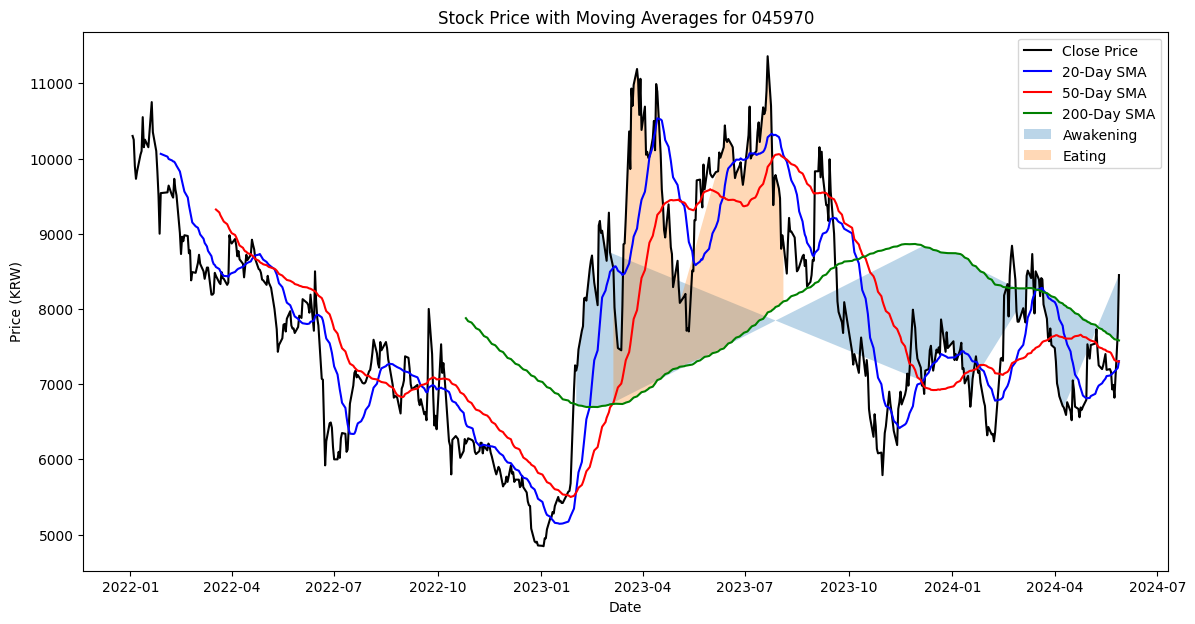

The current phase for 045970 is Awakening


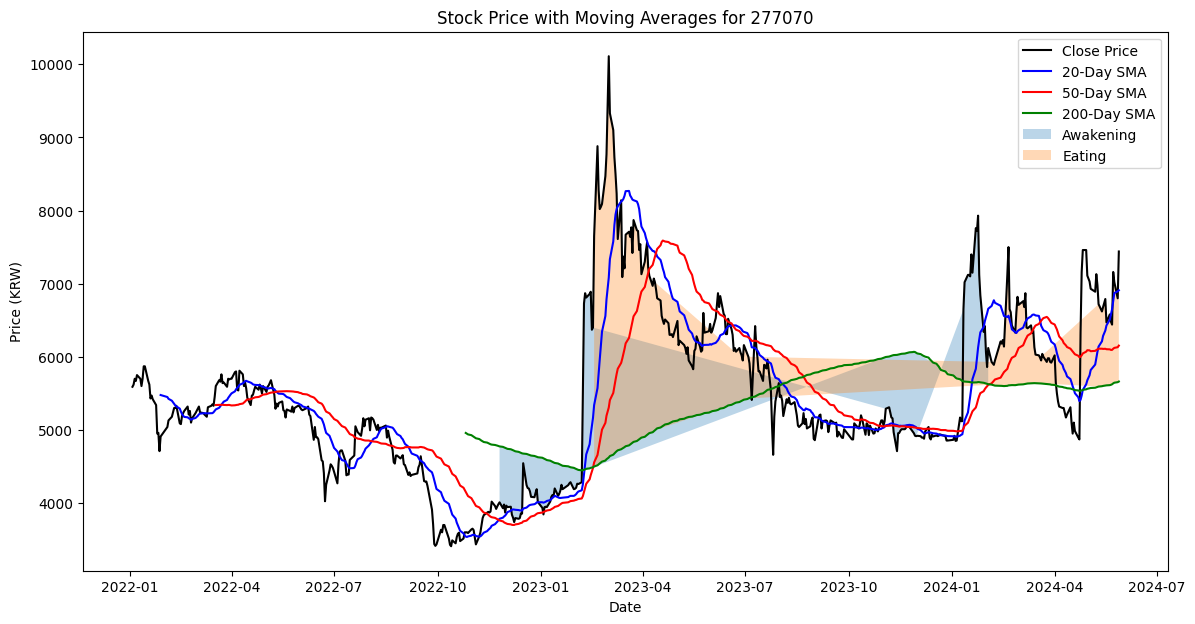

The current phase for 277070 is Eating


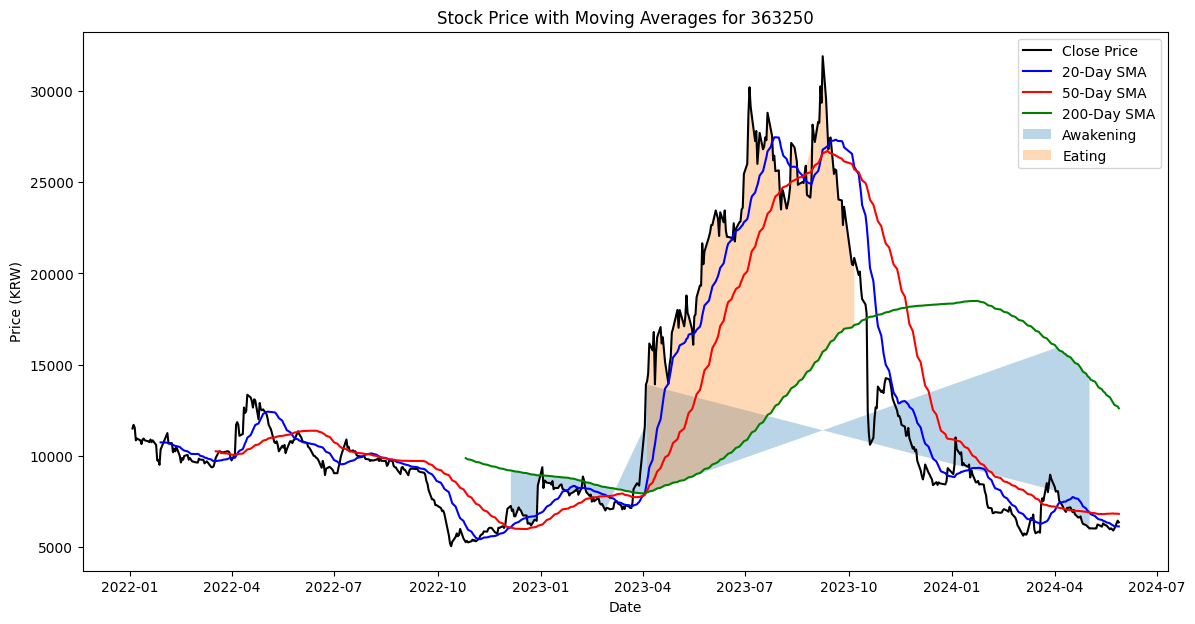

The current phase for 363250 is Sleeping


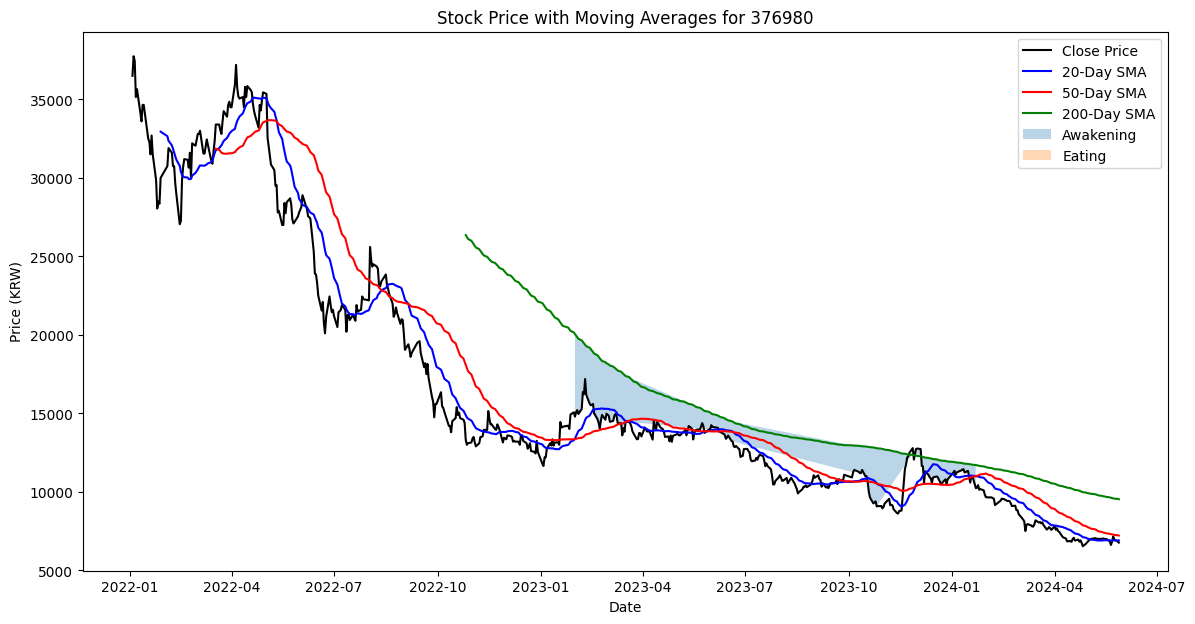

The current phase for 376980 is Sleeping


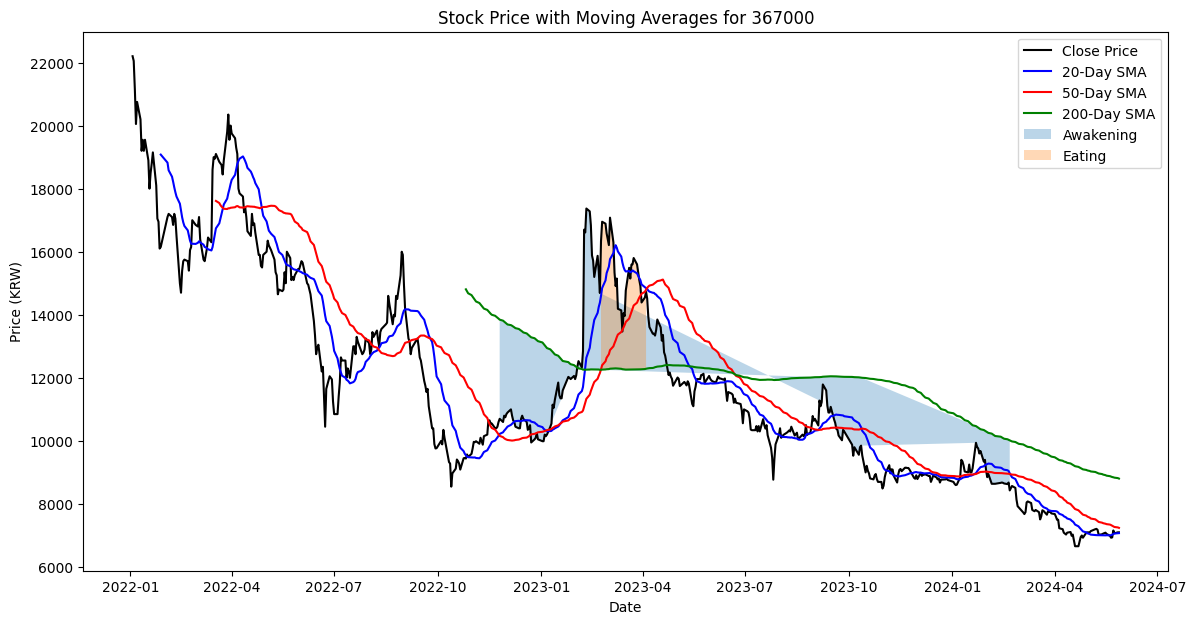

The current phase for 367000 is Sleeping


In [ ]:
# 필요한 패키지 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

!pip install finance-datareader yfinance

# 라이브러리 임포트
import FinanceDataReader as fdr
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic'

# KOSDAQ 상장 목록 가져오기
kosdaq_list = fdr.StockListing('KOSDAQ')

# 필터링 조건
price_lower = 5000
price_upper = 10000

# 필터링된 데이터프레임 저장용 리스트
filtered_stocks_data = []

# 오늘 날짜 구하기
today = datetime.today().strftime('%Y-%m-%d')

# 각 종목의 데이터를 가져와서 조건에 맞는지 확인
for code in kosdaq_list['Code']:
    try:
        # 종목 데이터 불러오기 (2023-01-02부터 오늘까지)
        data = fdr.DataReader(code, '2023-01-02', today)

        # 종가가 5000-10000 사이에 있는지 확인
        if data['Close'].iloc[-1] < price_lower or data['Close'].iloc[-1] > price_upper:
            continue

        # 거래량 평균 계산
        avg_volume = data['Volume'].mean()

        # 변동폭 계산 (종가의 표준편차)
        volatility = data['Close'].pct_change().std() * np.sqrt(252)

        # 최근 종가와 이동평균선 계산
        recent_close = data['Close'].iloc[-1]
        short_ma = data['Close'].rolling(window=5).mean()
        long_ma = data['Close'].rolling(window=20).mean()

        # Eating phase 확인
        if short_ma.iloc[-1] > long_ma.iloc[-1] and short_ma.iloc[-2] <= long_ma.iloc[-2]:
            filtered_stocks_data.append({
                'Code': code,
                'Current Price': recent_close,
                'Avg Volume': avg_volume,
                'Volatility': volatility
            })
    except Exception as e:
        # 데이터 불러오기에 실패하면 무시
        print(f"Failed to process {code}: {e}")
        continue

# 필터링된 종목 데이터프레임 생성
filtered_stocks_df = pd.DataFrame(filtered_stocks_data)

# 거래량이 많고 변동성이 높은 순으로 정렬
filtered_stocks_df = filtered_stocks_df.sort_values(by=['Avg Volume', 'Volatility'], ascending=[False, False])

# 상위 10개 종목 선정
top_10_stocks_df = filtered_stocks_df.head(10)

# 각 종목에 대한 데이터와 이동 평균선을 계산하고 시각화
for code in top_10_stocks_df['Code']:
    stock_data = fdr.DataReader(code, '2022-01-02', today)

    # 이동 평균선 계산
    stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
    stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

    # 그래프 그리기
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Close Price', color='black')
    plt.plot(stock_data['SMA20'], label='20-Day SMA', color='blue')
    plt.plot(stock_data['SMA50'], label='50-Day SMA', color='red')
    plt.plot(stock_data['SMA200'], label='200-Day SMA', color='green')
    plt.title(f'Stock Price with Moving Averages for {code}')
    plt.xlabel('Date')
    plt.ylabel('Price (KRW)')
    plt.legend()

    # 단계 식별
    stock_data['Phase'] = 'Sleeping'

    conditions = [
        (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] > stock_data['SMA200']),
        (stock_data['SMA20'] > stock_data['SMA50']) & (stock_data['SMA50'] < stock_data['SMA200']),
    ]
    choices = ['Eating', 'Awakening']

    stock_data['Phase'] = np.select(conditions, choices, default='Sleeping')

    # 단계 시각화
    phases = stock_data[stock_data['Phase'] != 'Sleeping']
    for phase in ['Awakening', 'Eating']:
        phase_data = phases[phases['Phase'] == phase]
        plt.fill_between(phase_data.index, phase_data['SMA200'], phase_data['Close'], label=phase, alpha=0.3)

    plt.legend()
    plt.show()

    # 가장 최근 데이터 포인트의 단계 표시
    current_phase = stock_data['Phase'].iloc[-1]
    print(f"The current phase for {code} is {current_phase}")

    # 단계 정보가 포함된 데이터프레임을 CSV 파일로 저장
    stock_data.to_csv(f"{code}_Stock_Phases.csv")
